# AUTHOR :  AFRINBANU A
## Prediction using Supervised ML
## Task - Predict the percentage of an student based on the no. of study hours


# Importing libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [53]:
df.isna().any()

Hours     False
Scores    False
dtype: bool

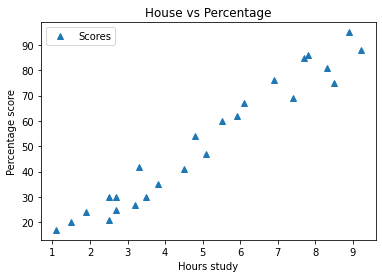

In [60]:
df.plot(x = "Hours",y = "Scores",style = "^")
plt.title("House vs Percentage")
plt.xlabel("Hours study")
plt.ylabel("Percentage score")
plt.show()

# From the above graph ,we can clearly see that there is positive linear relation between the"Numbers of hours studied"and "Percentage of score"

In [55]:
#Preparing the data
x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values


In [11]:
x[0:6]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5]])

In [12]:
y[0:21]

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30], dtype=int64)

# Split the dataset into training and testing set and then train model with training  set

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

#test size=0.2 means we are dividing train and test data in the ratio 80 :20
#random state is used to pickup the value randomly

# Training the Algorithm

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [15]:
M = regressor.coef_  #slope
M

array([9.91065648])

In [16]:
C = regressor.intercept_  # intercept
C

2.018160041434683

# Visualize the model

In [17]:
#After training the model we are visualizing linear regression on a graph.ie,checking how line will fit the data


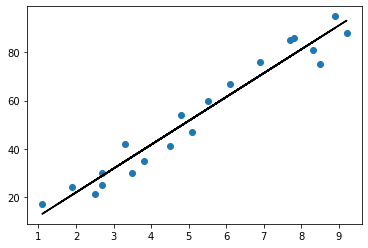

In [18]:
#Best fit line for training data
Y = M*x + C
#plotting for training data
plt.scatter(x_train,y_train)
plt.plot(x,Y, color = "Black")
plt.show()

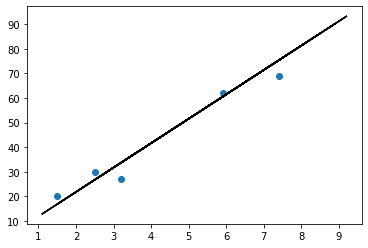

In [19]:
#Best fit line for testing data
Y= M* x + C
# plotting for testing data
plt.scatter(x_test,y_test)
plt.plot(x,Y,color = "Black")
plt.show()

# Making Prediction

In [20]:
print(x_test)  #testing data--Hours studied

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
y_predict = regressor.predict(x_test) #predicted score
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [22]:
print(y_test) #actual value

[20 27 69 30 62]


# Compare actual value with predicted value

In [27]:
cd = pd.DataFrame({'Actual':y_test,"Predicted":y_predict})
cd

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [41]:
#test with our own data
sd = regressor.predict([[9.25]])
sd

array([93.69173249])

In [44]:
print("Number of Hours :",str(9.25))
print("Predicted Score :",sd)

Number of Hours : 9.25
Predicted Score : [93.69173249]


# Evaluation Of Model

In [ ]:
#final step to check the model performance . This is very usefull when we want to compare the performance of model on the same 
#data set .For sake of simplicity we would use MSE( Mean squared Error) as the metric .

In [48]:
from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_predict))

Mean Absolute Error : 4.183859899002975


# So I Finally Predicted The Score Is : 93.69173249